### **Import Necessary Dependencies**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

### **Exploratory Data Analysis (EDA)**

In [5]:
data = pd.read_csv('dm_office_sales.csv')

In [99]:
# print * at the beginning and end of the header
def print_header(title):
    print("*" * 20, title, "*" * 20)
    
# print head values
def print_top_five_values(data):
    print_header("Top five values of dataset is")
    print(data.head(), "\n")

# shows column in the dataset joining with a comma 
def display_columns(data):
    print_header("Columns in Dataset is")
    print(", ".join(data.columns.tolist()), "\n")

# shows how many rows and column in the dataset
def display_dataset_shape(data):
    print_header("Dataset Shape")
    print(f'There are {data.shape[0]} rows and {data.shape[1]} columns\n')

# data types in the data frame
def display_data_types(data):
    print_header("Data_Type of each columns")
    print(data.dtypes, "\n")

# check the missing values in the df
def display_missing_values(data):
    print_header("Counting Missing values of each columns")
    print(data.isnull().sum().sort_values(ascending=False), "\n")

# count the same values that is repeated on the same column
def display_unique_values(data):
    print_header("Counting Number of Unique values in each columns")
    print(data.nunique(), "\n")

# count the same values that repeat in categorical features
def display_categorical_value_counts(data):
    print_header("Count Unique values of each catagorical features")
    print(data["division"].value_counts(), "\n")
    print(data["level of education"].value_counts(), "\n")

# basic statistics of data like std, mean, count, min, max
def display_basic_statistics(data):
    print_header("Basic Statistics of Data")
    print(data.describe().round(0), "\n")
    
# Getting the basic info about count and null values in the column
def display_basic_info(data):
    print_header("Basic info of Data")
    print(data.info(), "\n")

# call all the above functions 
def Data_EDA(data):
    """
    Perform exploratory data analysis (EDA) on the given dataset.

    This function displays various aspects of the dataset, including:
    - The top five values of the dataset
    - The names of the columns
    - The shape of the dataset (number of rows and columns)
    - The data types of each column
    - A count of missing values for each column
    - The number of unique values in each column
    - Count of unique values in specific categorical features
    - Basic statistics of numerical features
    - Basic information about the dataset structure

    Parameters:
    data : pandas.DataFrame
        The dataset on which to perform analysis or EDA. It should be in a Pandas data frame.

    Returns:
    None
    """
    print_top_five_values(data)
    display_columns(data)
    display_dataset_shape(data)
    display_data_types(data)
    display_missing_values(data)
    display_unique_values(data)
    display_categorical_value_counts(data)
    display_basic_statistics(data)
    display_basic_info(data)

Data_EDA(data)

******************** Top five values of dataset is ********************
          division  level of education  training level  work experience  \
0         printers        some college               2                6   
1         printers  associate's degree               2               10   
2      peripherals         high school               0                9   
3  office supplies  associate's degree               2                5   
4  office supplies         high school               1                5   

   salary   sales  
0   91684  372302  
1  119679  495660  
2   82045  320453  
3   92949  377148  
4   71280  312802   

******************** Columns in Dataset is ********************
division, level of education, training level, work experience, salary, sales 

******************** Dataset Shape ********************
There are 1000 rows and 6 columns

******************** Data_Type of each columns ********************
division              object
level of education    ob

## **Data Basic Statistics**

**Mean, Median, Std, mode**

In [101]:
# Also used describe function to compute statistics and then take a transpose of the data frame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
training level,1000.0,1.262,0.925317,0.0,1.0,1.0,2.00,3.0
work experience,1000.0,6.142,2.947970,0.0,4.0,6.0,8.00,16.0
salary,1000.0,90264.207,17398.617174,41660.0,77584.0,89946.0,101834.25,159148.0
sales,1000.0,339833.846,108555.773316,53067.0,259257.5,338145.5,415210.25,761477.0


In [103]:
#Statistics for categorical columns and then take a transpose of the data frame
data.describe(include='object').T

,count,unique,top,freq
division,1000,5,office supplies,252
level of education,1000,5,associate's degree,412


**Calculate Additional statistics**

In [12]:
def calculate_summary_statistics(data):
    """
    Calculate mean, median, mode, standard deviation, skewness, and kurtosis
    for each numeric column in the DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    pd.DataFrame: A DataFrame containing mean, median, mode, standard deviation, skewness, and kurtosis for each numeric column.
    """
    # Initialize an empty list to store the summary statistics
    summary_stats = []
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            # Calculate statistics for each numeric column
            stats = {
                'Column': column,
                'Mean': data[column].mean(),
                'Median': data[column].median(),
                'Mode': data[column].mode()[0],  # Take the first mode
                'Standard Deviation': data[column].std(),
                'Skewness': skew(data[column].dropna()),  # Drop NaN values
                'Kurtosis': kurtosis(data[column].dropna())  # Drop NaN values
            }
            summary_stats.append(stats)
    # Convert the list of dictionaries to a DataFrame
    summary_df = pd.DataFrame(summary_stats)

    return summary_df

# Example usage:
summary_df = calculate_summary_statistics(data)
summary_df



,Column,Mean,Median,Mode,Standard Deviation,Skewness,Kurtosis
0,training level,1.262,1.0,1,0.925317,0.186714,-0.862042
1,work experience,6.142,6.0,5,2.947970,0.218313,-0.156070
2,salary,90264.207,89946.0,65696,17398.617174,0.198986,0.026409
3,sales,339833.846,338145.5,266030,108555.773316,0.213559,-0.069589


**Data Correlation**

In [14]:
# Calculate the correlation matrix, considering only numeric columns.
data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,training level,work experience,salary,sales
training level,1.000000,-0.011451,0.304357,0.507209
work experience,-0.011451,1.000000,0.842906,0.809969
salary,0.304357,0.842906,1.000000,0.897376
sales,0.507209,0.809969,0.897376,1.000000


Salary and Sales are highly correlated (0.897), suggesting a positive relationship.
Work Experience shows a strong correlation with both Salary (0.843) and Sales (0.809).
Training Level has a moderate positive correlation with Sales (0.507) but a lower correlation with Salary (0.304)

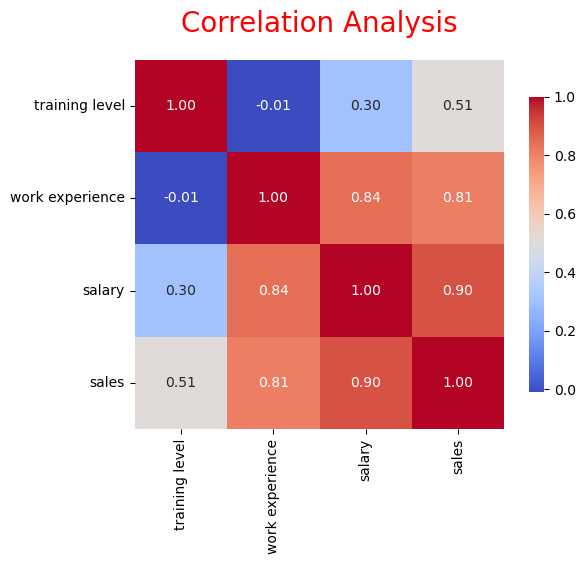

In [108]:
def plot_heatmap(data):
    """
    Create a heatmap to visualize the correlation matrix.
    """
    # Calculate the correlation matrix
    corr = data.corr(numeric_only=True) 
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Analysis', color='Red', fontsize=20, pad=20)
    plt.show()

# funtion calls
plot_heatmap(data)


## **Graphical Visualization**

### **Count-Plot**
 Count plots are useful for comparing  
* Different groups or categories, making it easy to see patterns, trends, or differences.
---




In [19]:
# shows columns name
data.columns

Index(['division', 'level of education', 'training level', 'work experience',
       'salary', 'sales'],
      dtype='object')

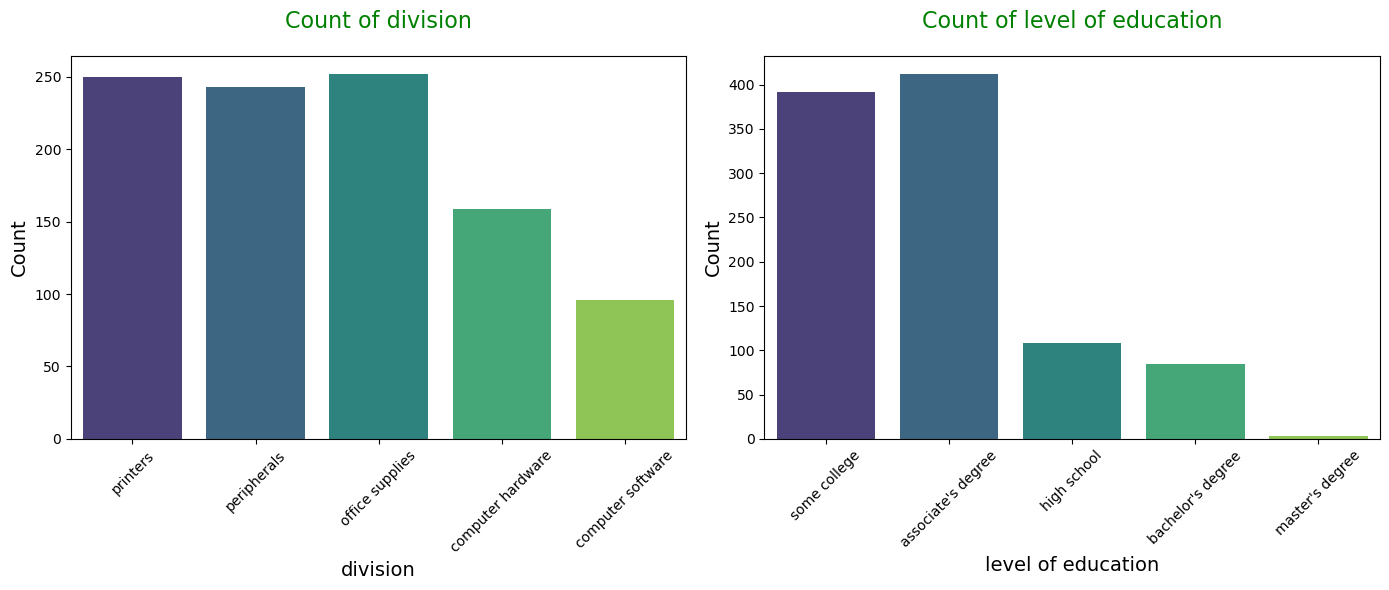

In [112]:
def plot_count_bar(data, columns):
    """
    Create bar plots for counting occurrences in specified categorical columns.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names to plot.

    Returns:
    None
    """
    # Create a 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    for i, column in enumerate(columns):
        # Create a count plot for each column
        sns.countplot(x=column, data=data, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count of {column}', fontsize=16, pad=20, color="Green")
        axes[i].set_xlabel(column, fontsize=14)
        axes[i].set_ylabel('Count', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


plot_count_bar(data, ['division', 'level of education'])


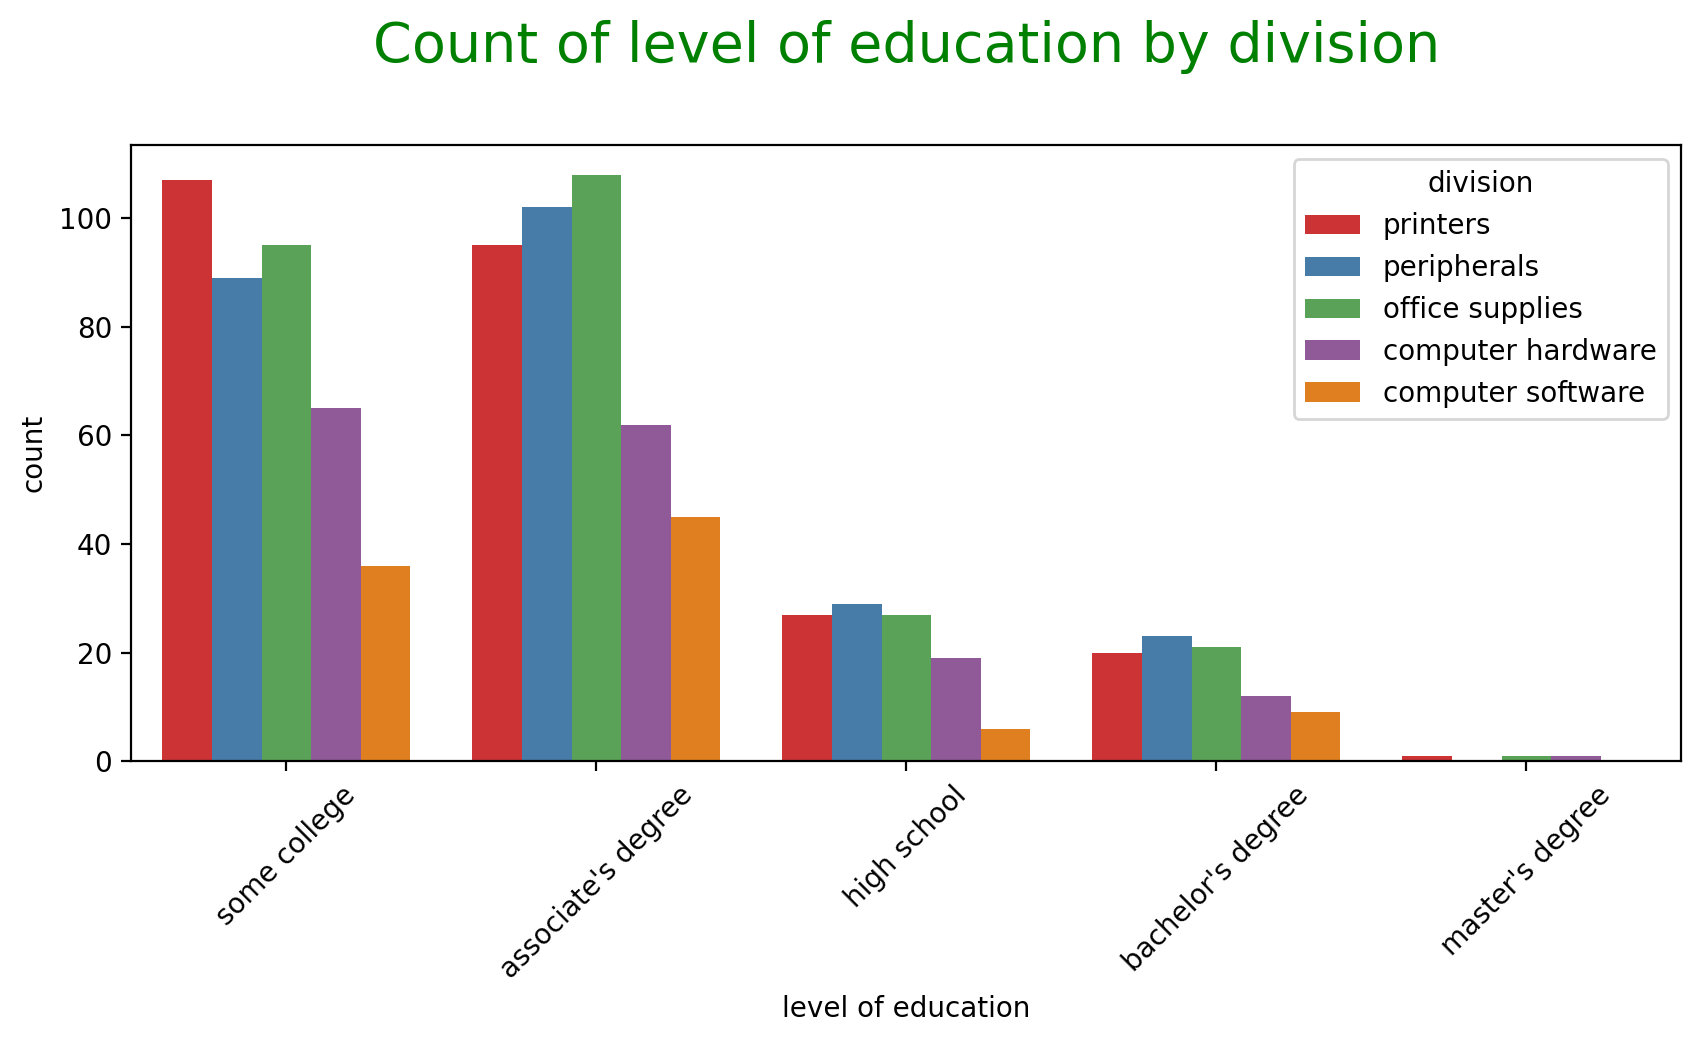

In [132]:
def plot_count_bar(data, x , hue):
    plt.figure(figsize=(10,4),dpi=200)
    sns.countplot(x=x, data=data, hue=hue, palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f'Count of {x} by {hue}', pad=30, color="Green", fontsize=20)
    plt.show()

# plot a bar chart with level of education and division of devices
plot_count_bar(data, 'level of education', 'division')

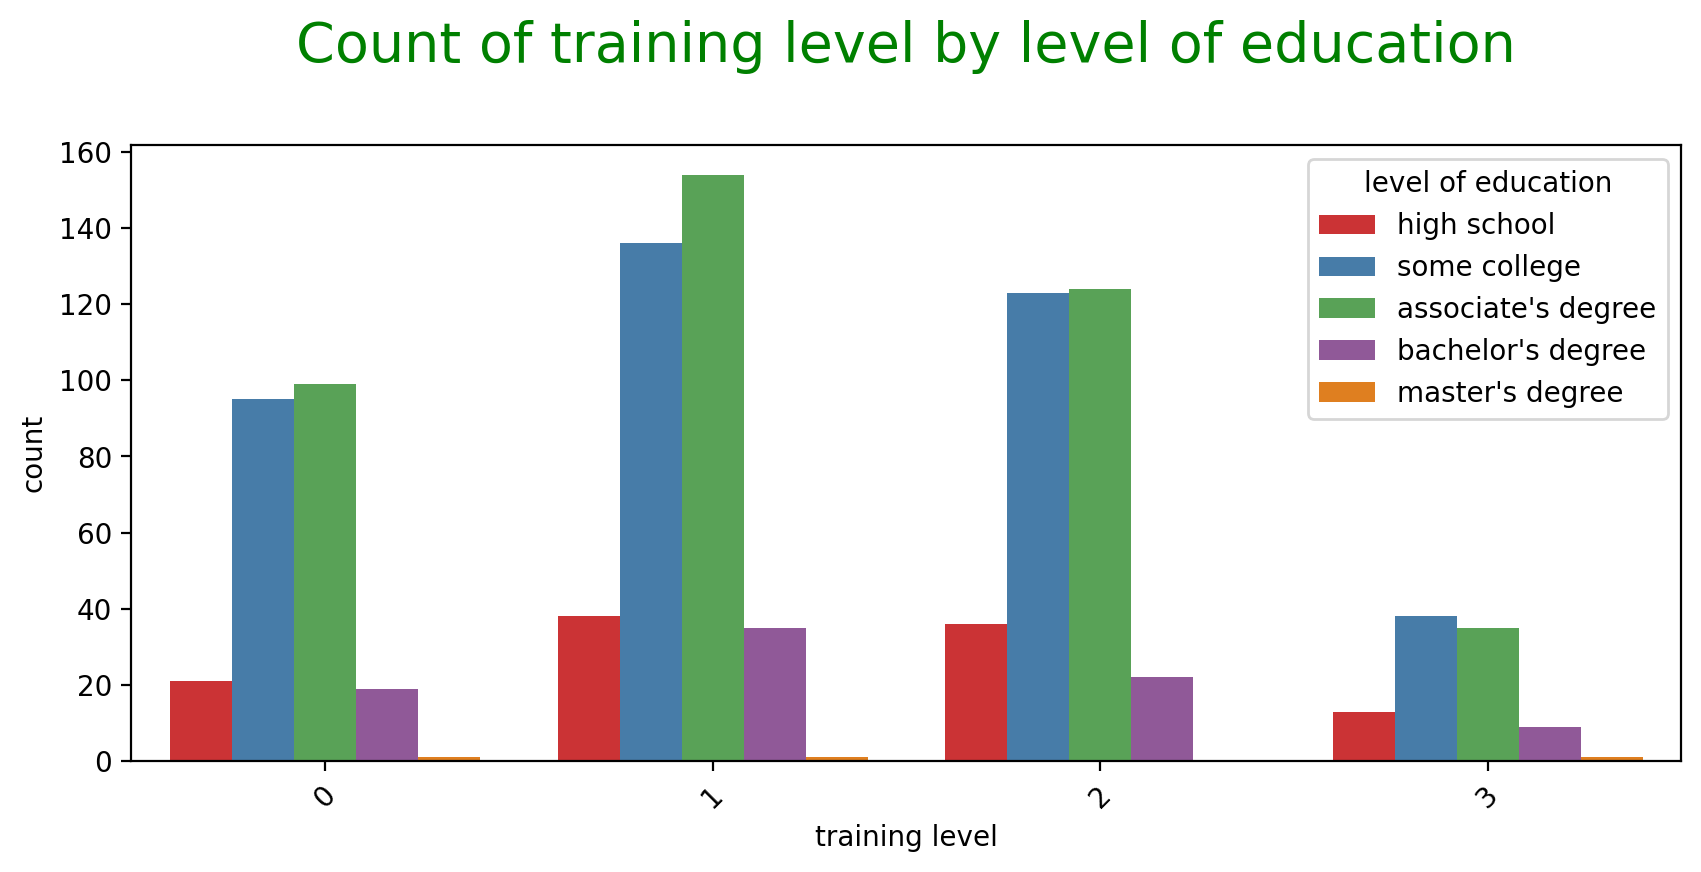

In [134]:
# plot a bar chart with training level and level of education
plot_count_bar(data, 'training level', 'level of education')

In [234]:
# group the data by division and level of education and then count the number of rows, the unstack converts the series into data frame
stacked_data = data.groupby(['division', 'level of education']).size().unstack()
stacked_data

level of education,associate's degree,bachelor's degree,high school,master's degree,some college
division,,,,,
computer hardware,62.0,12.0,19.0,1.0,65.0
computer software,45.0,9.0,6.0,NaN,36.0
office supplies,108.0,21.0,27.0,1.0,95.0
peripherals,102.0,23.0,29.0,NaN,89.0
printers,95.0,20.0,27.0,1.0,107.0


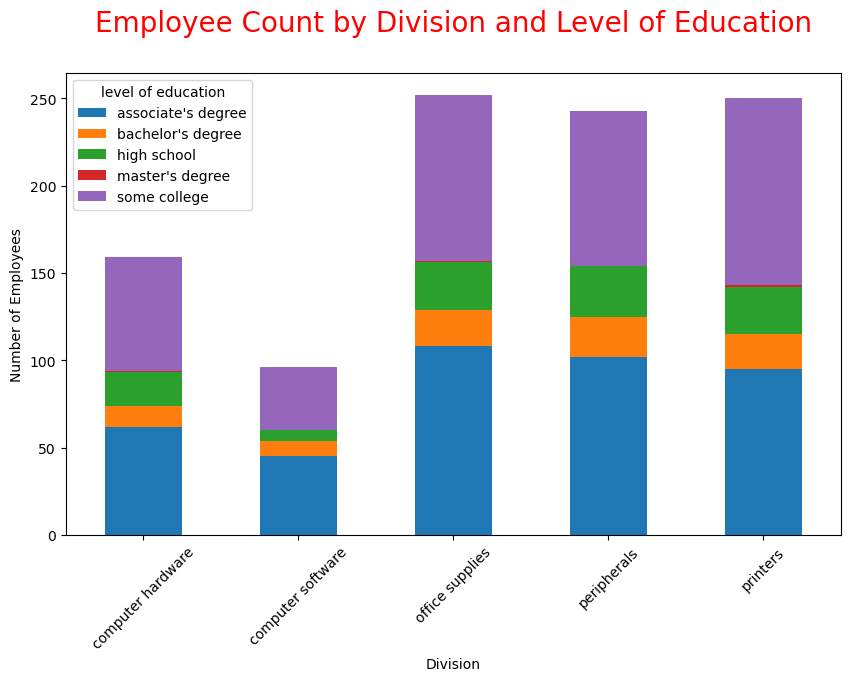

In [136]:
def plot_stacked_bar(data, x_column, stack_column, title, x_label, y_label):
    """
    Plot a stacked bar chart for categorical data.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_column (str): The column to use for the x-axis categories.
    stack_column (str): The column to use for stacking within each x-axis category.
    title (str): The title of the plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    """
    # Group data by the x_column and stack_column, and count occurrences
    stacked_data = data.groupby([x_column, stack_column]).size().unstack()

    # Plotting a stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Adding titles and labels
    plt.title(title, pad=30, color="red", fontsize=20)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=stack_column)
    plt.xticks(rotation=45)

    plt.show()

# Call the function with x_column as division and stack_column as the level of education and with appropriate title and labels
plot_stacked_bar(
    data=data,
    x_column='division',
    stack_column='level of education',
    title='Employee Count by Division and Level of Education',
    x_label='Division',
    y_label='Number of Employees'
)


### **Histogram**

*   To determine distribution of each discrete numerical columns of data.


In [139]:
def plot_histogram(column, title):
    """ 
    Plot a histogram with KDE for a given column.
   
    parameters: 
    columns(DataFrame): It contains the data of the column
    title(str): The title of the plot.
    """
    plt.figure()
    # Use Seaborn's hisplot to plot the histogram with KDE (kernel density estimate)
    sns.histplot(data[column], bins=20, kde=True, color='g')
    plt.title(f'Histogram of {title}', pad=30, color="Green", fontsize=20)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

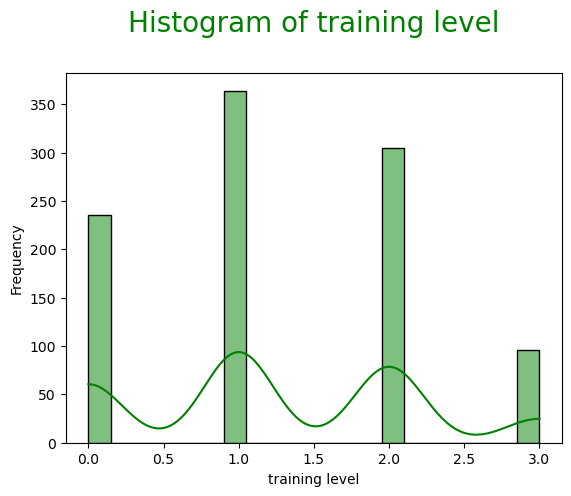

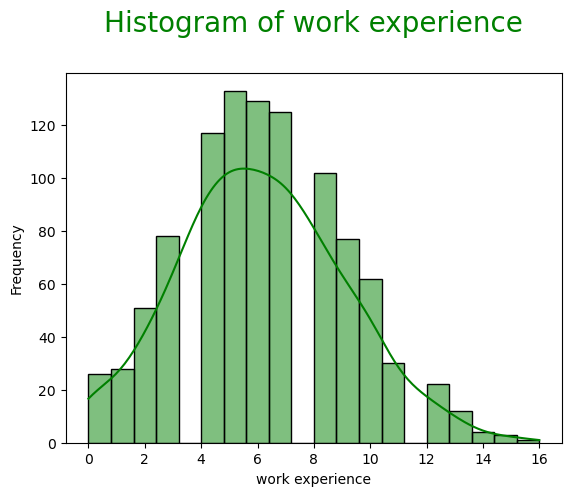

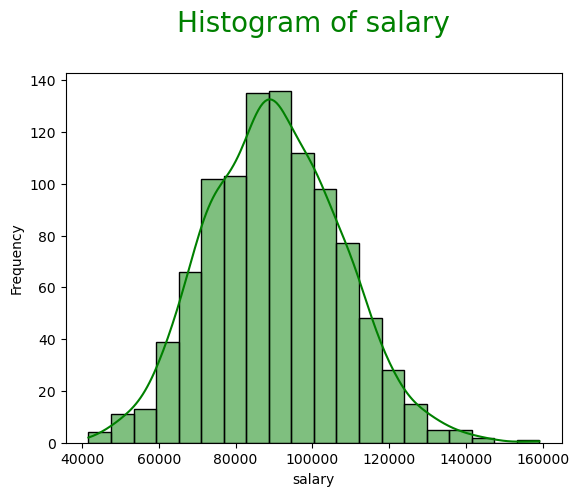

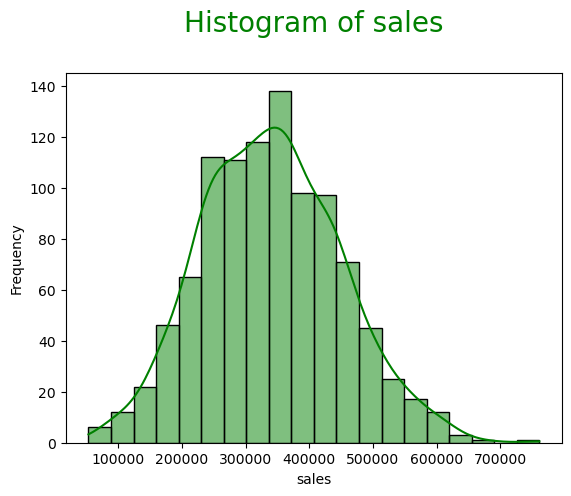

In [141]:
# Call functions to generate a plot for each column
for column in data.columns:
    # checks if particular column is numeric or not
    if pd.api.types.is_numeric_dtype(data[column]):
       plot_histogram(column, column)
       print("\n")

### **Kernel Density Estimate (KDE)**

A Kernel Density Estimate (KDE) plot is a way to visualize the distribution of a continuous variable. It provides a smooth estimate of the probability density function of a random variable, making it easier to understand the underlying distribution of the data.

In [36]:
def plot_kde_subplots(data, columns):
    """
    Create KDE plots for the specified columns in a 2x2 subplot layout.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    columns (list): A list of column names for which to create KDE plots.

    Returns:
    None
    """
    # Create a 2x2 subplot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    # Flatten the 2D array of axes to 1D for easy iteration
    axes = axes.flatten()  

    for i, column in enumerate(columns):
        # get the values from the columns arrays and then iterate it to show the graphs
        sns.kdeplot(data[column], fill=True, ax=axes[i], color='r')
        axes[i].set_title(f'KDE Plot of {column}', fontsize=14)
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

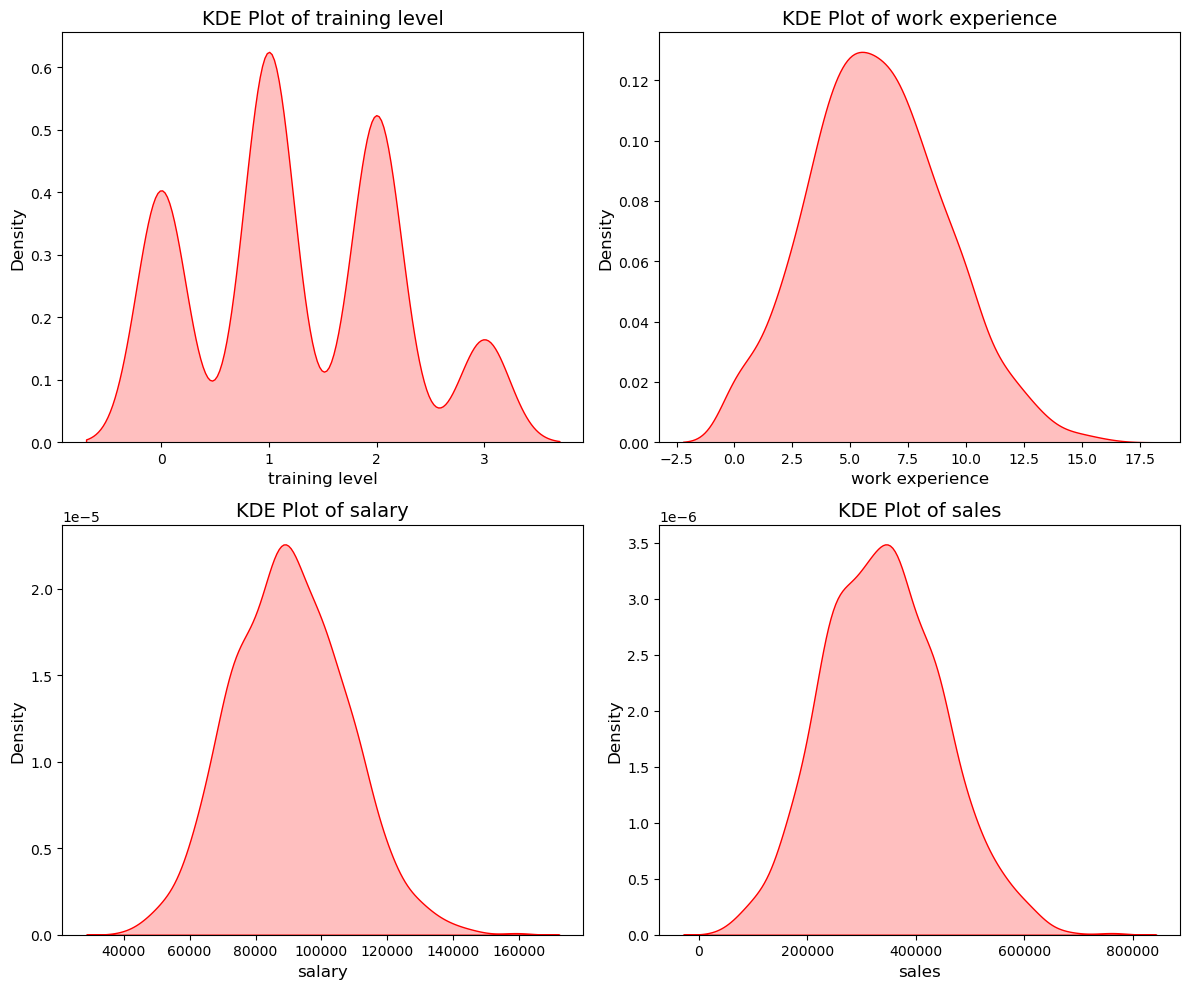

In [38]:
# columns that is exists (having numerical values) in the data frame and iterate it separately
columns= ['training level', 'work experience','salary', 'sales']
plot_kde_subplots(data, columns)

### **Scatter Plot:**
To examine the relationship between each feature.

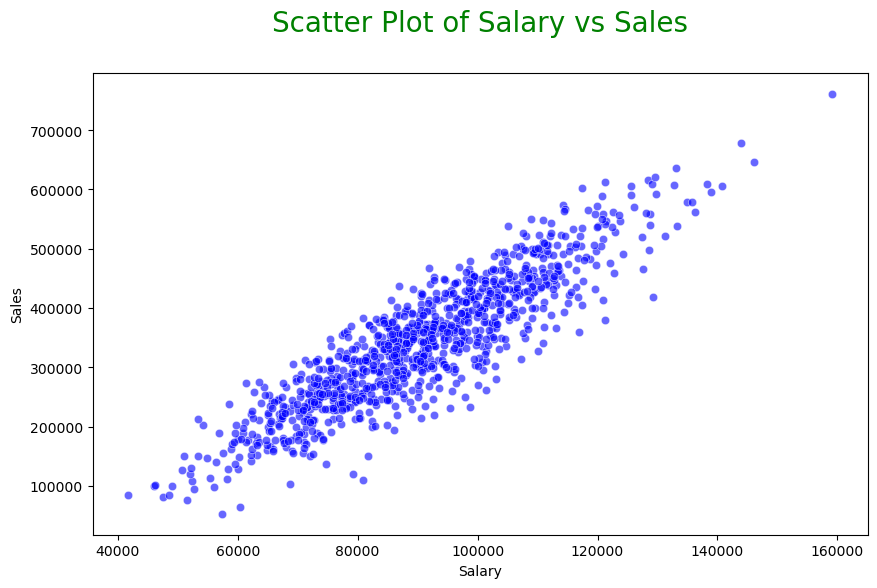

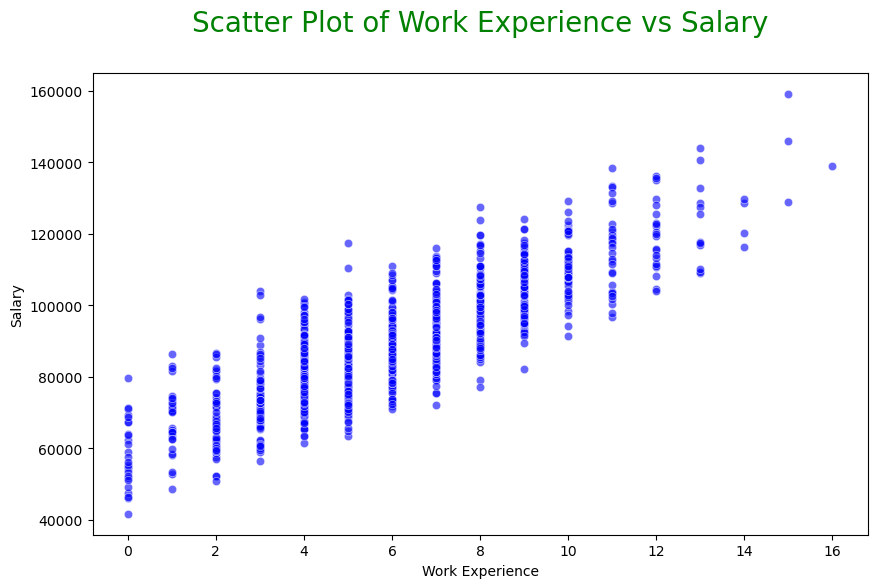

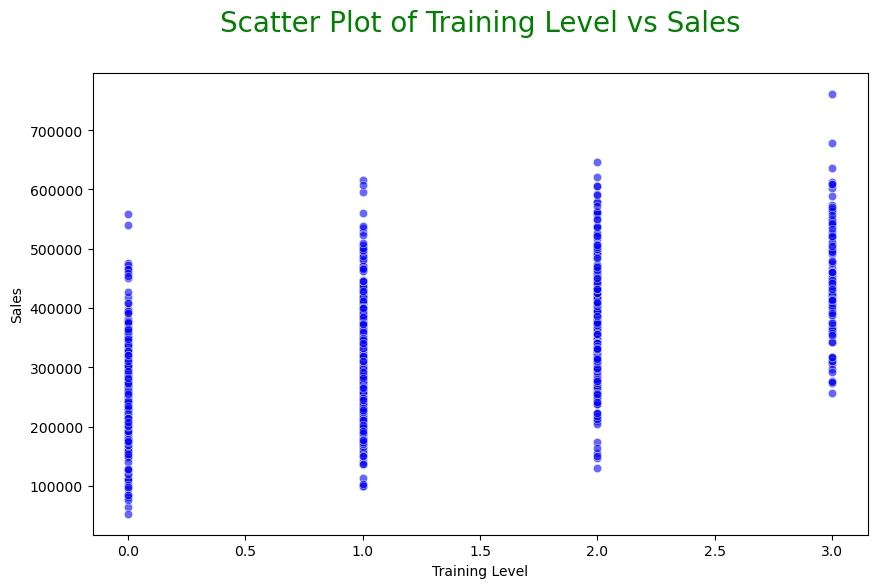

In [153]:
def plot_scatters(data, column_pairs_array):
    """
    Plot multiple scatter plots for specified pairs of numerical columns.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column_pairs (list of dict): A list of dictionaries, where each dictionary
                                 contains 'x', 'y', 'title', 'x_label', and 'y_label' keys
                                 for each scatter plot.
    """
    # Loop through each column pair to create individual scatter plots
    for pair in column_pairs_array:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=pair['x'], y=pair['y'], data=data, alpha=0.6, color='b')
        plt.title(pair['title'], pad=30, color="Green", fontsize=20)
        plt.xlabel(pair['x_label'])
        plt.ylabel(pair['y_label'])
        plt.show()


# Define the scatter plot pairs and their details
scatter_plots_array = [
    {
        # for salary
        'x': 'salary',  
        # for sales
        'y': 'sales', 
        'title': 'Scatter Plot of Salary vs Sales',
        'x_label': 'Salary',
        'y_label': 'Sales'
    },
    {
        # for work experience
        'x': 'work experience', 
        # for salary
        'y': 'salary',  
        'title': 'Scatter Plot of Work Experience vs Salary',
        'x_label': 'Work Experience',
        'y_label': 'Salary'
    },
    {
        # for training level
        'x': 'training level',  
        #  for sales
        'y': 'sales',  
        'title': 'Scatter Plot of Training Level vs Sales',
        'x_label': 'Training Level',
        'y_label': 'Sales'
    }
]

# Call the function with the data and defined scatter plot pairs
plot_scatters(data=data, column_pairs_array=scatter_plots_array)


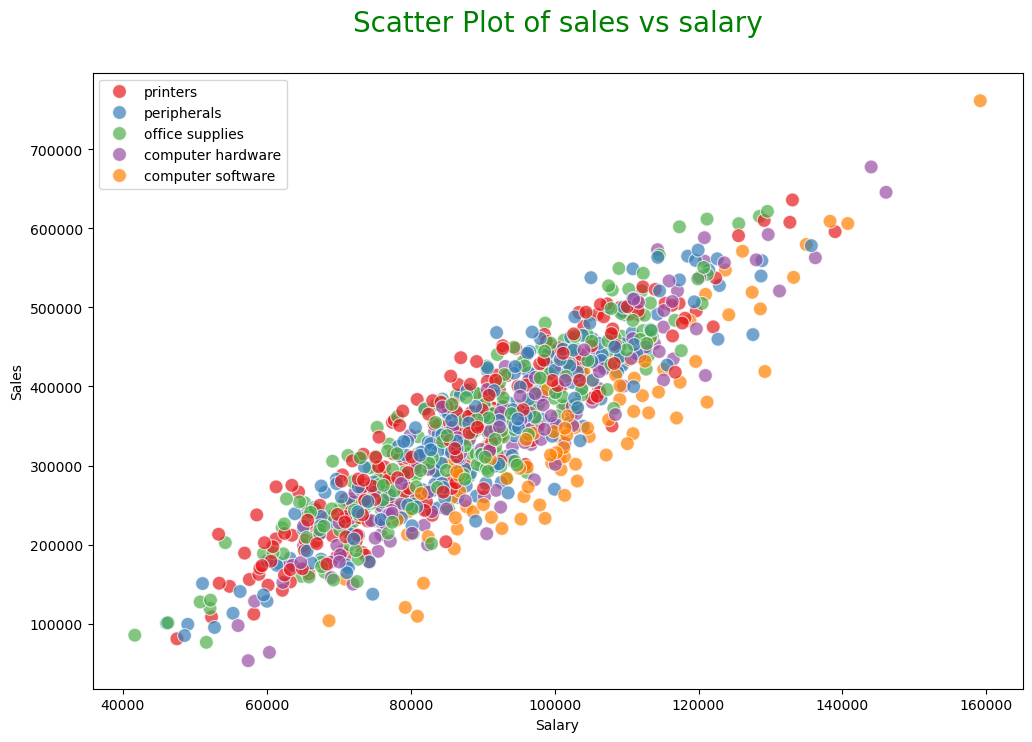

In [155]:
def plot_scatter_with_hue_and_style(data, x, y, hue=None, style=None, size=100):
    """
    Create scatter plots with optional hue and style.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    y (str): The name of the column for the y-axis.
    hue (str): The name of the column to use for color encoding (optional).
    style (str): The name of the column to use for style encoding (optional).
    size (int): The size of the scatter plot points (default is 100).
    """
    plt.figure(figsize=(12, 8))

    sns.scatterplot(
        x=x,
        y=y,
        data=data,
        # allow easy coloring of data points based on the categorical data
        hue=hue,
        style=style,
        s=size,
        alpha=0.7,
        palette='Set1'
    )

    plt.title(f'Scatter Plot of {y} vs {x}', pad=30, color="Green", fontsize=20)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.legend(loc='best')
    plt.show()
    
# scatter plot based on the sales and salary
plot_scatter_with_hue_and_style(data=data, x='salary', y='sales', hue='division')


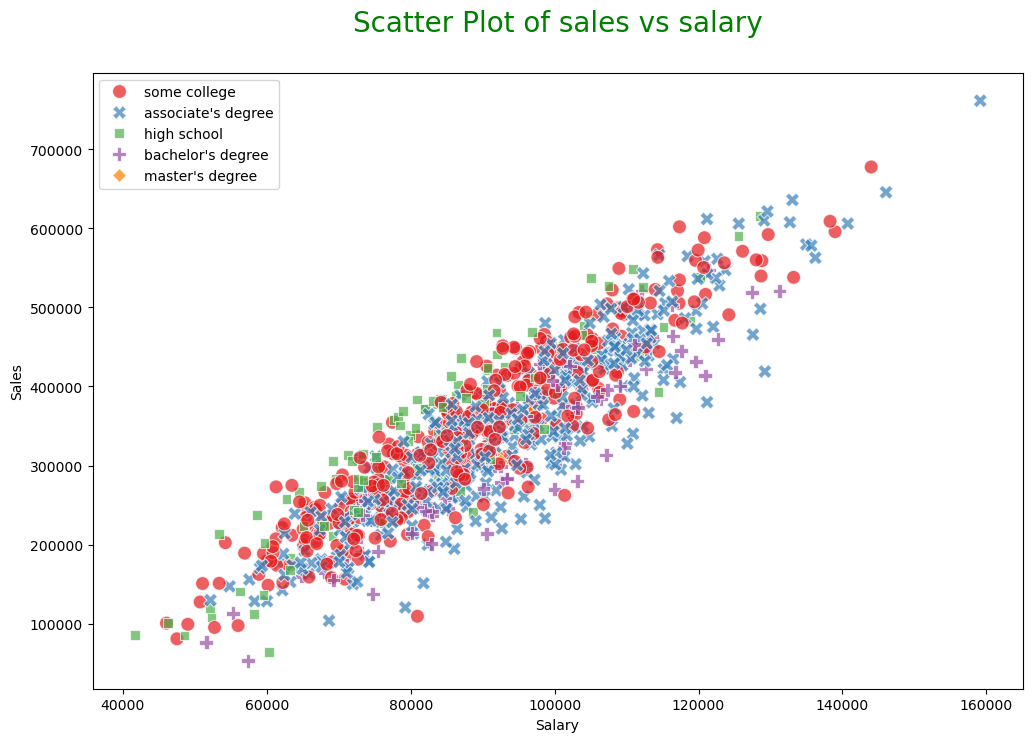

In [157]:
# scatter plot having sales and salray with huw and size values
plot_scatter_with_hue_and_style(data=data, x='salary', y='sales', hue='level of education', style='level of education', size=100)

### **Box Plot**
* To find outlies present in dataset



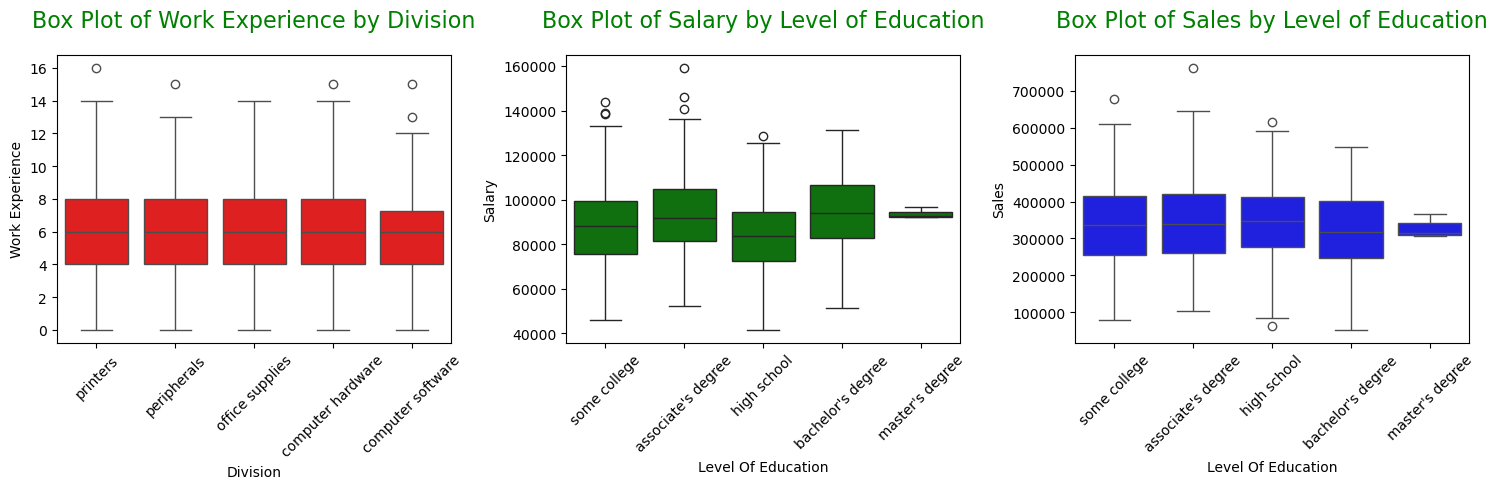

In [170]:
def create_box_plots(data):
    # Define the variables for plotting
    plot_details = [
        ('division', 'work experience',
         'Box Plot of Work Experience by Division'),
        ('level of education', 'salary',
         'Box Plot of Salary by Level of Education'),
        ('level of education', 'sales',
         'Box Plot of Sales by Level of Education')
    ]
    # calute the length of the plot details
    num_plots = len(plot_details)
    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
    # Use palette 
    palette = ['r', 'g', 'b']
    for i, (ax, (x, y, title)) in enumerate(zip(axes, plot_details)):
        sns.boxplot(data=data, x=x, y=y, ax=ax, palette=[palette[i]]) # Use the palette with index
        ax.set_title(title, pad=20, color="Green", fontsize=16)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# function calls
create_box_plots(data)

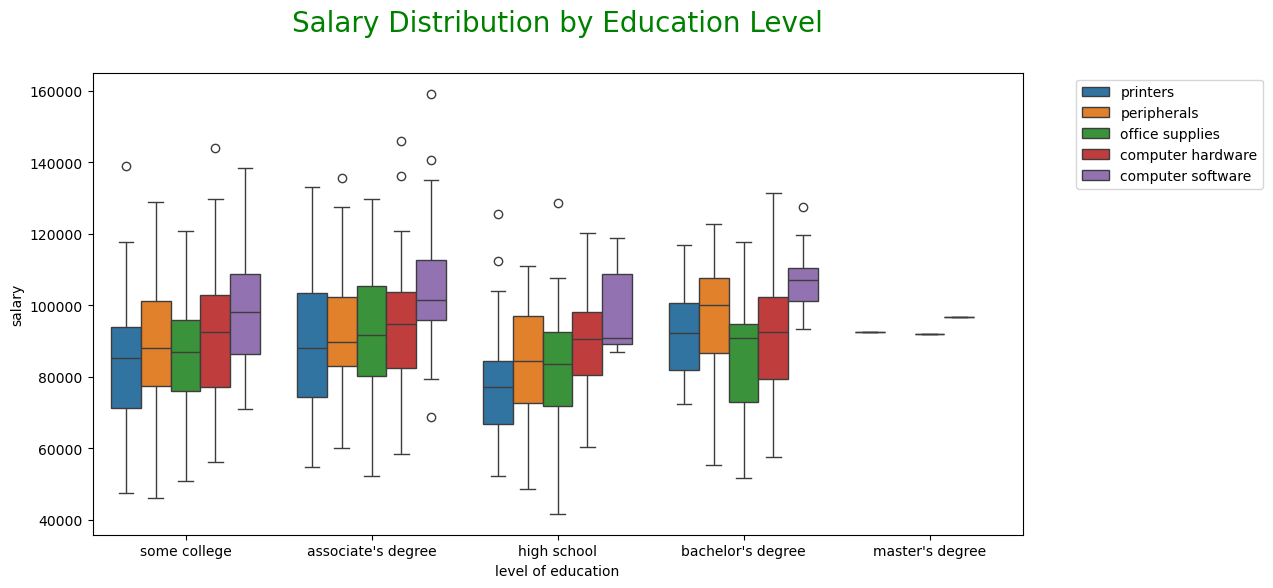

In [174]:
def plot_boxplot(data, x, y, hue=None, title=None, legend_outside=False):
    """
    Create a box plot to visualize the distribution of a numerical variable
    against a categorical variable, optionally colored by a third categorical variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis (categorical).
    y (str): The name of the column for the y-axis (numerical).
    hue (str, optional): The name of the column for color encoding (categorical).
    title (str, optional): The title of the box plot
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=data, hue=hue)
    plt.title(title,  pad=30, color="Green", fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

#  box plot with salary distribution by educational level
plot_boxplot(data=data, x='level of education', y='salary', hue='division', title='Salary Distribution by Education Level')


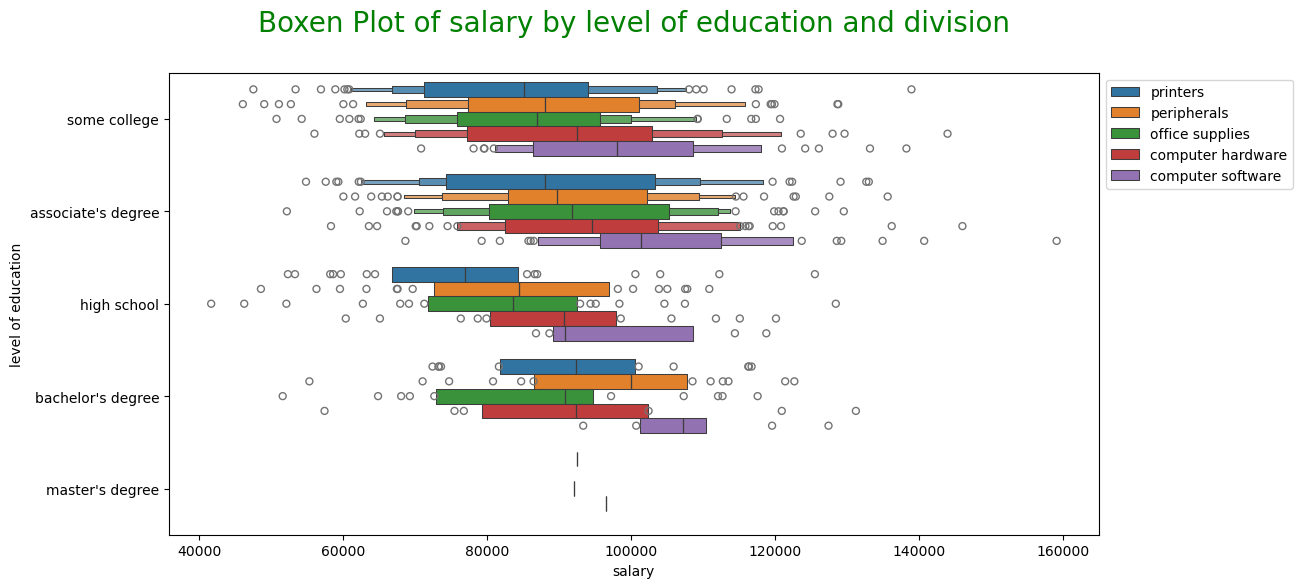

In [182]:
def plot_boxenplot(data):
    """
    Create a boxen plot to visualize the distribution of a numerical variable
    against a categorical variable, optionally colored by a third categorical variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    """
    plt.figure(figsize=(12, 6))
    sns.boxenplot(x='salary', y='level of education', hue='division', data=data)
    plt.title('Boxen Plot of salary by level of education and division',  pad=30, color="Green", fontsize=20)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

# Boxen Plot of salary by level of education and division
plot_boxenplot(data=data)

### **Violinplot**
A violin plot plays a similar role as a box plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

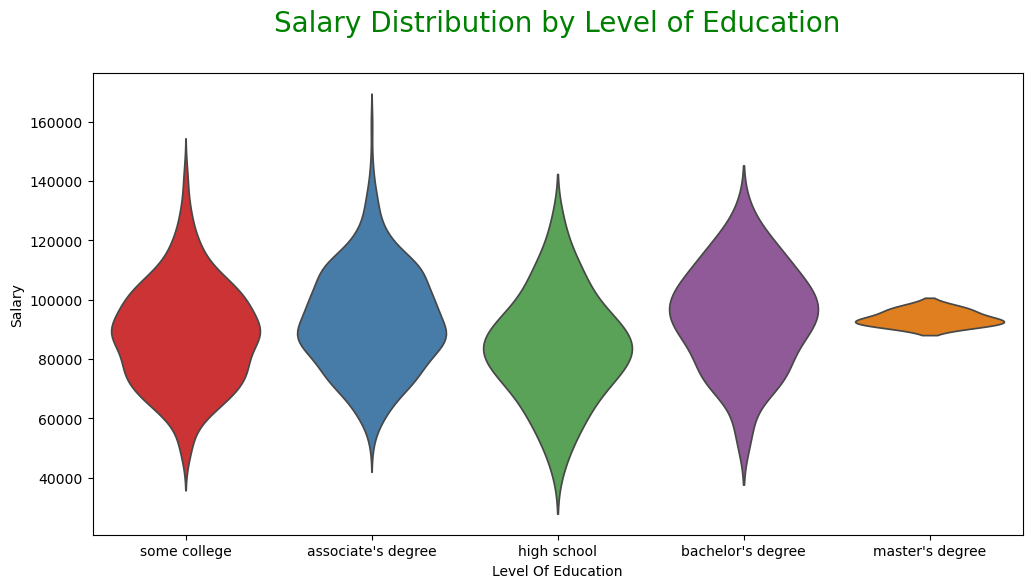

In [194]:
def plot_violin(data, x, y, hue=None, inner=None, title=None):
    """
    Create a violin plot to visualize the distribution of a numerical variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis (categorical variable).
    y (str): The name of the column for the y-axis (numerical variable).
    hue (str): The name of the column to use for color encoding.
    inner (str): The representation of the distribution inside the violin ('box', 'quartile', etc.).
    title (str): The title of the plot.
    """
    plt.figure(figsize=(12, 6))

    sns.violinplot(x=x, y=y, data=data, hue=hue, inner=inner, palette='Set1', split=hue is not None)

    plt.title(title if title else f'Violin Plot of {y} by {x}', pad=30, color="Green", fontsize=20)
    plt.xlabel(x.title() if x else '')
    plt.ylabel(y.title() if y else '')
    plt.show()

# function calls which show salary distribution by the level of education
plot_violin(data=data, x='level of education', y='salary', title='Salary Distribution by Level of Education')


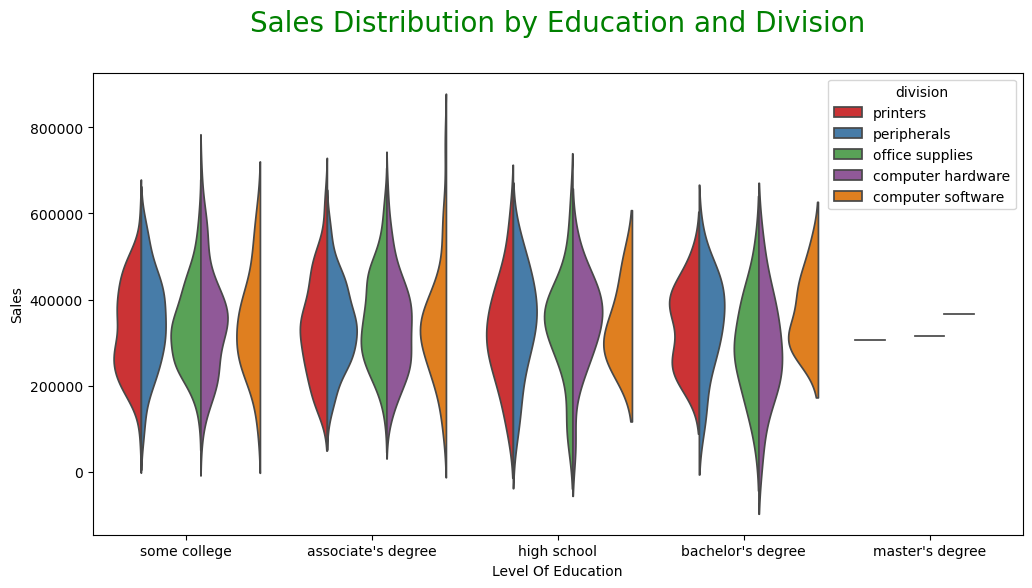

In [232]:
# violin plot sales Distribution by Education and Division
plot_violin(data=data, x='level of education', y='sales', hue='division', title='Sales Distribution by Education and Division')

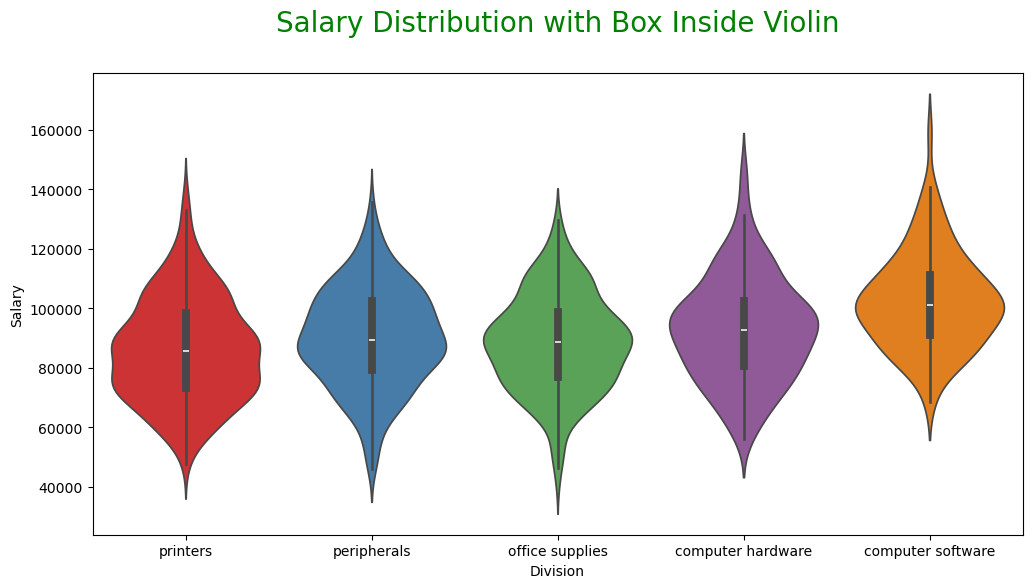

In [197]:
# plot which shows salary distribution with a box inside
plot_violin(data=data, x='division', y='salary', inner='box', title='Salary Distribution with Box Inside Violin')

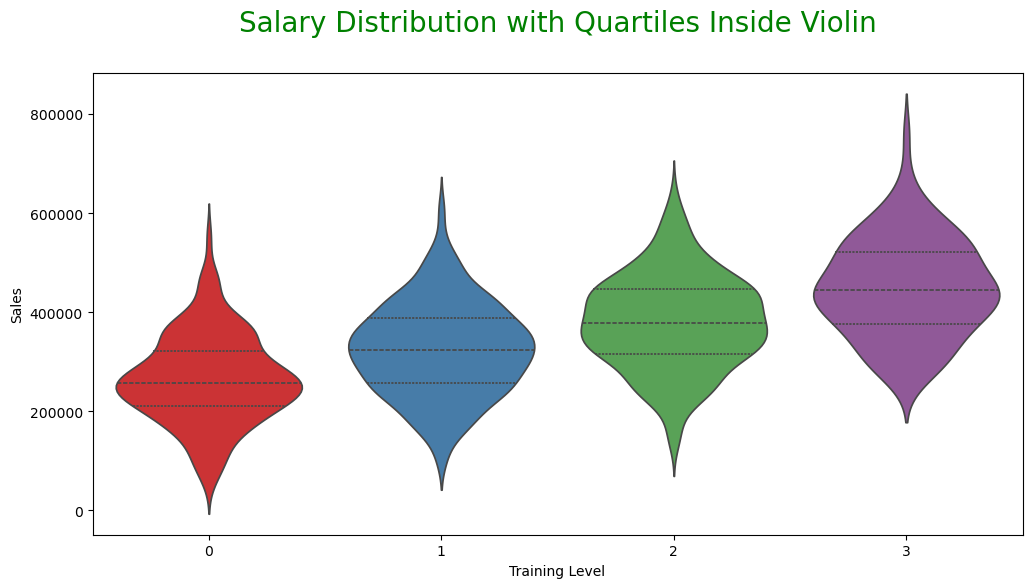

In [198]:
# plot which shows salary distribution with quartile inside
plot_violin(data=data, x='training level', y='sales', inner='quartile', title='Salary Distribution with Quartiles Inside Violin')

### **Swarmplot Plot**
We can use a boxenplot and swarmplot to achieve the same effect as the boxplot and violinplot, but with slightly more information included. Be careful when using these plots, as they often require you to educate the viewer with how the plot is actually constructed. Only use these if you are sure your audience will understand the visualization.

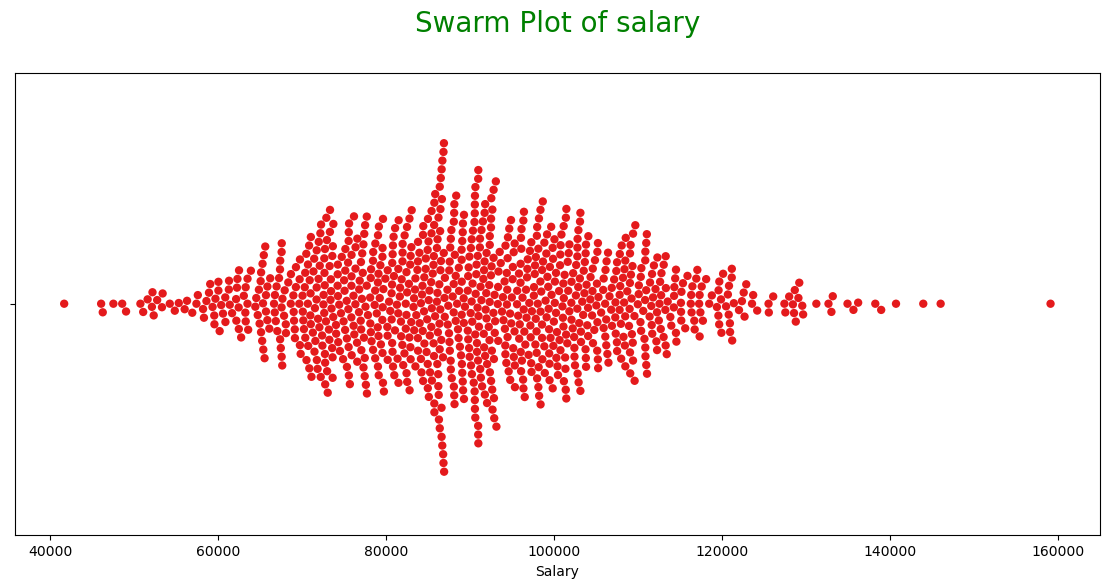

In [221]:
def plot_swarm(data, x, y=None, hue=None, size=6, title=None):
    """
    Create swarm plots to visualize the distribution of a numerical variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    y (str): The name of the column for the y-axis.
    hue (str): The name of the column to use for color encoding.
    size (int): The size of the swarm plot points.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(14, 6))

    sns.swarmplot(x=x, y=y, data=data, hue=hue, size=size, palette='Set1', dodge=True)

    plt.title(title if title else f'Swarm Plot of {x}' + (f' by {y}' if y else ''), pad=30, color="Green", fontsize=20)
    plt.xlabel(x.capitalize())
    if y:
        plt.ylabel(y.capitalize())
    # plt.legend(loc='best')
    plt.show()

# Swarm plot for salary
plot_swarm(data=data, x='salary')  

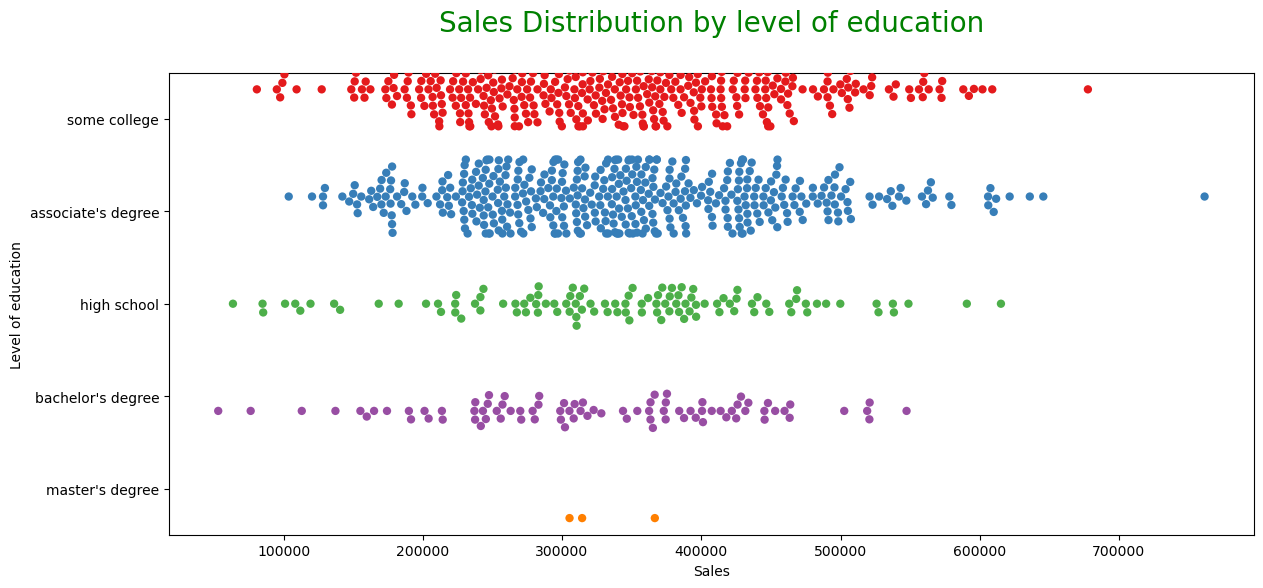

In [222]:
# sales distribution by level of education
plot_swarm(data=data, x='sales', y='level of education', title='Sales Distribution by level of education') 


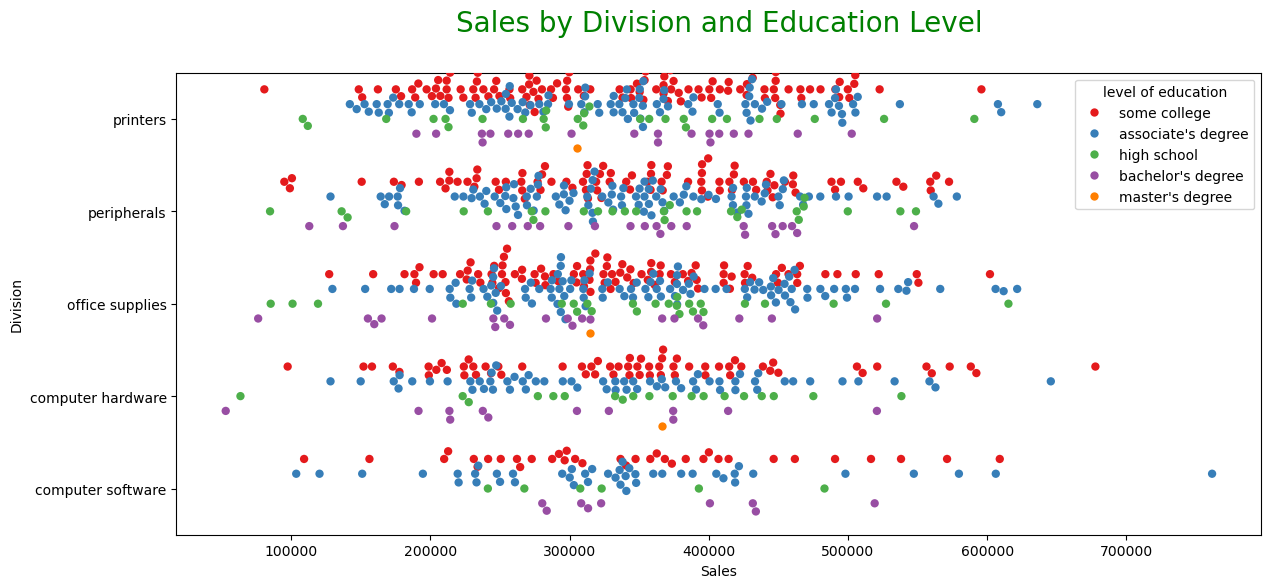

In [230]:
# Sales by Division and Education Level by hue
plot_swarm(data=data, x='sales', y='division', hue='level of education', title='Sales by Division and Education Level')

### **PieChart**

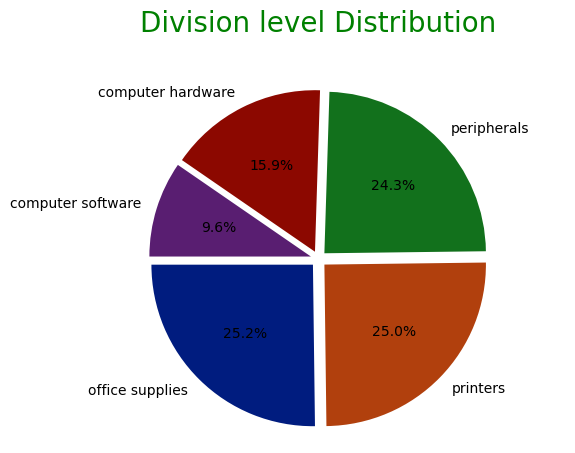

In [226]:
def plot_pie(data, column, title=None, colors=None):
    """
    Create a pie plot to visualize the distribution of a categorical variable.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to visualize as a pie chart.
    title (str, optional): The title of the pie chart.
    colors (list, optional): List of colors for the pie chart sections.
    """
    # Calculate the distribution of the specified column
    counts = data[column].value_counts()
    if colors is None:
        colors = sns.color_palette('dark', len(counts))
    explode = [0.05] * len(counts)  # Slightly separate each slice
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=180,
            colors=colors, explode=explode, labeldistance=1.1)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')
    plt.title(title if title else f'Pie Chart of {column.capitalize()} Distribution',  pad=30, color="Green", fontsize=20)
    plt.show()

# shows divisions of devices/software that is used
plot_pie(data=data, column='division', title='Division level Distribution',)

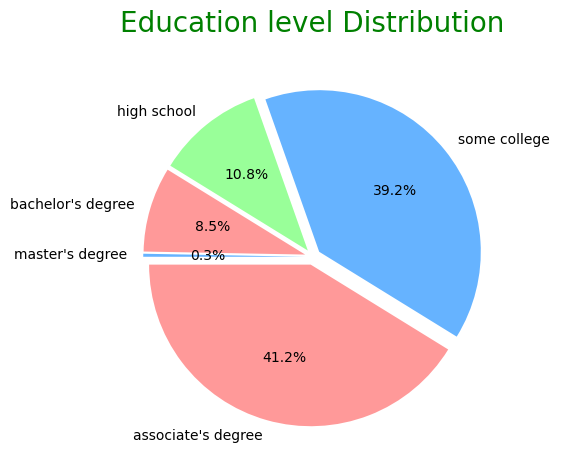

In [228]:
# pie plot with having some color effects shows level of education 
plot_pie(data=data, column='level of education', title='Education level Distribution', colors=['#ff9999', '#66b3ff', '#99ff99'])